In [2]:
!pip install -e ../causal_forecast

Obtaining file:///Users/jamel/Documents/CausalForecasting/causal_forecast
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for causal_forecast (pyproject.toml) ... done
  Created wheel for causal_forecast: filename=causal_forecast-0.1.0-0.editable-py3-none-any.whl size=1633 sha256=fdb1d96b3ec69cee083a0792d1decf1ca88f9b36677f277c35f71ea429b522ab
  Stored in directory: /private/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/pip-ephem-wheel-cache-i647_cc4/wheels/78/be/8c/0f893aa99dcfb96c93dfc90b08ebb0ca0d36609b54f5f6de0d
Successfully built causal_forecast
  Attempting uninstall: causal_forecast
    Found existing installation: causal_forecast 0.1.0
    Uninstalling causal_forecast-0.1.0:
      Successfully uninstalled causal_forecast-0.1.0


In [2]:
# Add the parent directory to Python path so Jupyter can find your package
import os
import sys

# Get the absolute path of the notebook's directory
notebook_dir = os.path.abspath('')
# Add parent directory to Python path
parent_dir = os.path.dirname(notebook_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    print(f"Added {parent_dir} to Python path")

# Now try importing
import causal_forecast

In [17]:
# Create sample time series data
import pandas as pd
import numpy as np
import networkx as nx
import pandas as pd
from causal_forecast import CausalForecaster

# Create causal graph
G = nx.DiGraph()
G.add_edges_from([
    ('temperature', 'humidity'),
    ('temperature', 'rain'),
    ('humidity', 'crop_yield'),
    ('rain', 'crop_yield')
])

temperature = np.random.normal(25, 5, len(dates))
humidity = temperature + np.random.normal(60, 10, len(dates))
rain = temperature + np.random.binomial(1, 0.3, len(dates))
crop_yield = humidity + rain + np.random.normal(90, 10, len(dates))

dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data = pd.DataFrame({
    'timestamp': dates,
    'temperature': temperature,
    'humidity': humidity,
    'rain': rain,
    'crop_yield': crop_yield
})

# Initialize forecaster with time component
forecaster = CausalForecaster(
    data=data,
    graph=G,
    target='crop_yield',
    time_column='timestamp',
    forecast_horizon=30,  # Forecast 30 days ahead
    lookback_periods=7    # Use 7 days of history
)

# Train the models
forecaster.fit()

# Make time series predictions
future_predictions = forecaster.predict(steps=30)
print("Future predictions:\n", future_predictions.head())

# Run counterfactual scenario
counterfactual_predictions = forecaster.run_counterfactual(
    interventions={'temperature': 35},
    steps=30
)
print("\nCounterfactual predictions:\n", counterfactual_predictions.head())

Training model for node: temperature
Training model for node: humidity
Training model for node: rain
Training model for node: crop_yield
Future predictions:
    timestamp  temperature   humidity       rain  crop_yield
0 2024-01-01    26.787632  86.164774  27.315796  202.462258
1 2024-01-02    26.569512  86.603882  26.983507  204.106602
2 2024-01-03    26.356533  86.187415  26.835864  205.671176
3 2024-01-04    25.201427  85.685462  26.201558  204.077803
4 2024-01-05    25.274113  86.501281  25.622641  204.152085

Counterfactual predictions:
    timestamp  temperature   humidity       rain  crop_yield
0 2024-01-01           35  86.164774  27.315796  202.462258
1 2024-01-02           35  87.514484  26.373640  204.106602
2 2024-01-03           35  87.306515  26.249579  204.716774
3 2024-01-04           35  86.325208  25.799166  203.968791
4 2024-01-05           35  85.446489  25.839267  204.164087


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_9789/3535965617.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


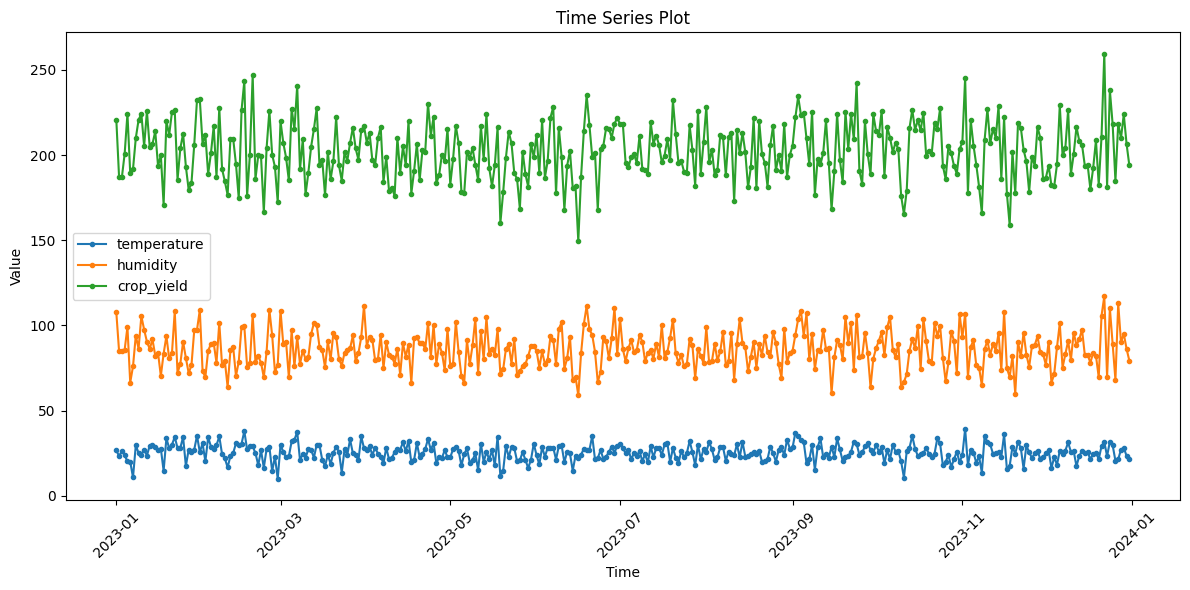

In [18]:
from causal_forecast import (
    plot_time_series,
    plot_forecast_comparison,
    plot_seasonal_decomposition,
    plot_counterfactual_timeseries
)

# Plot original time series
fig = plot_time_series(data, 'timestamp', ['temperature', 'humidity', 'crop_yield'])
fig.show()


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_9789/2329554261.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


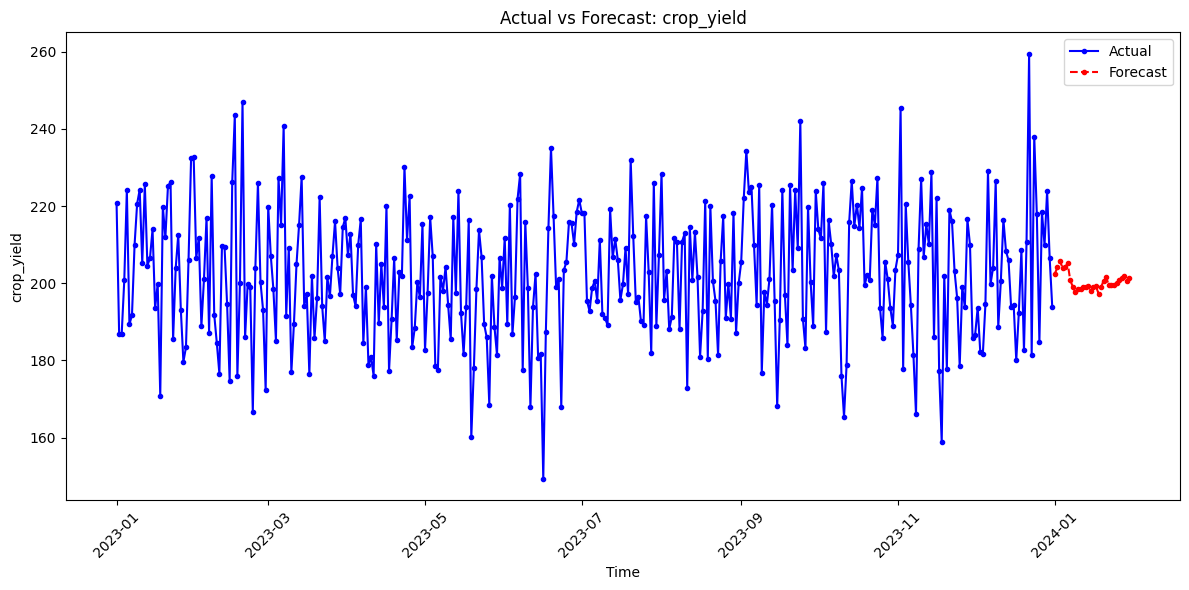

In [19]:

# Compare actual vs forecast
fig = plot_forecast_comparison(data, future_predictions, 'timestamp', 'crop_yield')
fig.show()


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_9789/3477786182.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


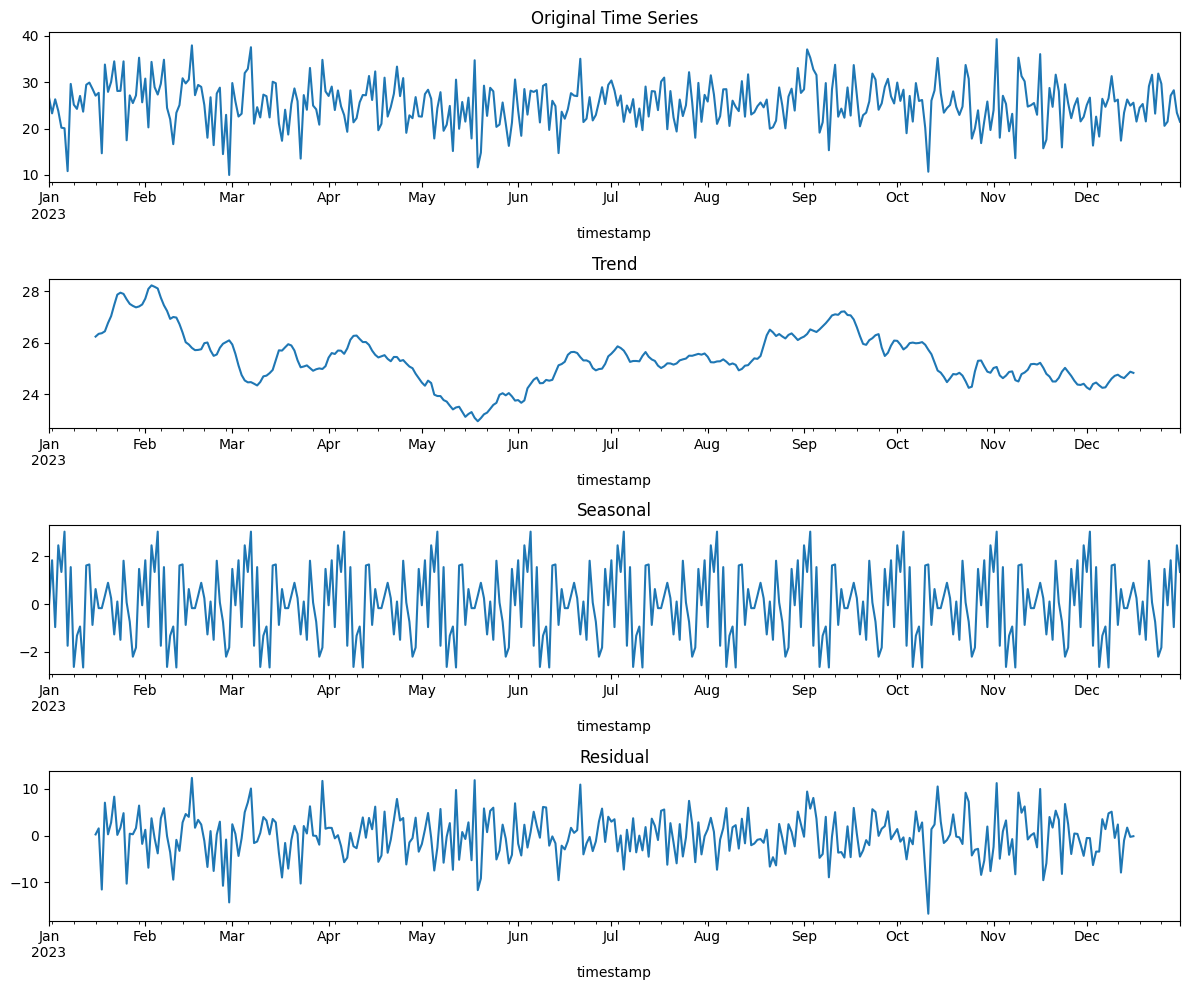

In [20]:

# Plot seasonal decomposition
fig = plot_seasonal_decomposition(data, 'timestamp', 'temperature')
fig.show()


/var/folders/jk/5pvh3_7x019cjd3ls0bkbbhh0000gn/T/ipykernel_9789/2283759860.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


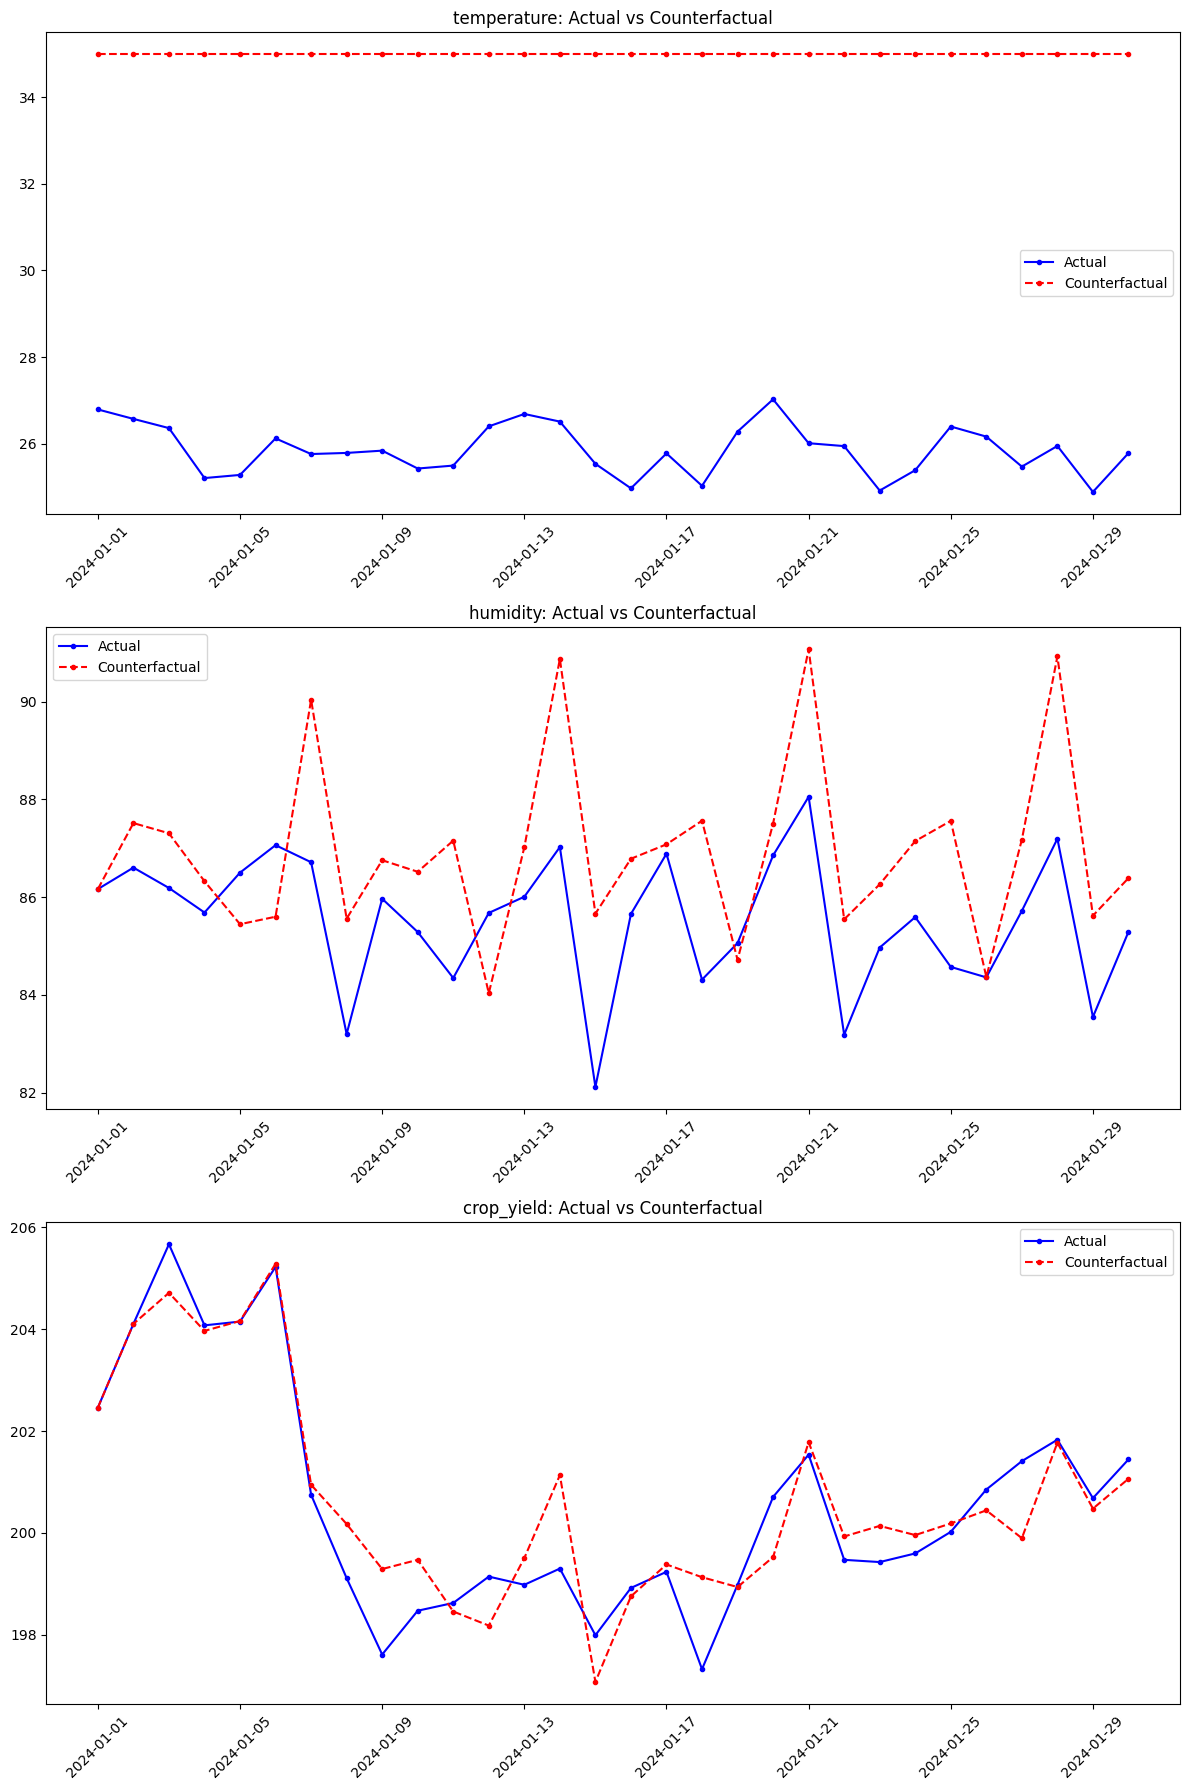

In [21]:

# Compare actual vs counterfactual predictions
fig =  plot_counterfactual_timeseries(
    future_predictions, 
    counterfactual_predictions, 
    'timestamp',
    ['temperature', 'humidity', 'crop_yield']
)
fig.show()